In [1]:
! pip install transformers
! pip install datasets

     |████████████████████████████████| 4.0 MB 4.2 MB/s 
     |████████████████████████████████| 6.6 MB 52.7 MB/s 
     |████████████████████████████████| 596 kB 67.0 MB/s 
     |████████████████████████████████| 895 kB 52.4 MB/s 
     |████████████████████████████████| 77 kB 7.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 325 kB 4.2 MB/s 
     |████████████████████████████████| 1.1 MB 58.3 MB/s 
     |████████████████████████████████| 136 kB 44.0 MB/s 
     |████████████████████████████████| 212 kB 50.5 MB/s 
     |████████████████████████████████| 127 kB 68.5 MB/s 
     |████████████████████████████████| 271 kB 51.6 MB/s 
     |████████████████████████████████| 144 kB 72.5 MB/s 
     |████████████████████████████████| 94 kB 2.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib

In [2]:
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from datasets import load_dataset, Dataset
import pandas as pd
from huggingface_hub import notebook_login
import torch

In [3]:
!git config --global credential.helper store
notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token


In [4]:
from datasets import load_dataset

dataset = load_dataset("hate_speech_offensive")

Using custom data configuration default


Generating train split:   0%|          | 0/24783 [00:00<?, ? examples/s]

Dataset hate_speech_offensive downloaded and prepared to /root/.cache/huggingface/datasets/hate_speech_offensive/default/1.0.0/5f5dfc7b42b5c650fe30a8c49df90b7dbb9c7a4b3fe43ae2e66fabfea35113f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
labels = pd.DataFrame(dataset['train']['class'])
tweets = pd.DataFrame(dataset['train']['tweet'])
data = pd.concat([labels, tweets],axis=1,ignore_index=True)
data.columns = ['label', 'tweet']

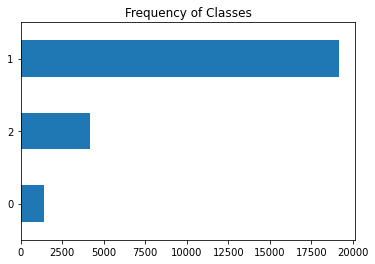

In [6]:
import matplotlib.pyplot as plt

labels[0].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

In [7]:
undersample = RandomUnderSampler(sampling_strategy='all')

In [8]:
new_text,new_label = undersample.fit_resample(tweets, labels)

In [9]:
data = pd.concat([new_text,new_label],axis=1,ignore_index=True)
data.columns = ['tweet','label']

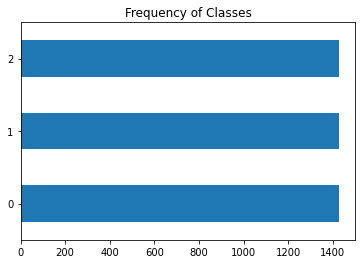

In [10]:
import matplotlib.pyplot as plt

new_label[0].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

In [11]:
data

,tweet,label
0,@TheErniie You're a little bitch.,0
1,Kanye west is a faggot,0
2,@Hovaa_ #niggerfood #niggerperson #you #are #a...,0
3,RT @YABOYLILB: If I ride up to your bitch in t...,0
4,"@Jaytwofly huh, lol mad nigger is mad",0
...,...,...
4285,RT @LucentVariable: @TonyJRodriguez friendly r...,2
4286,@LinzBella \nYou date colored men?,2
4287,RT @BoatBuilder_: call me a free bird,2
4288,RT @BroganWebber: Wiz is garbage to be put in ...,2


In [12]:
dataset = Dataset.from_pandas(data)
dataset = dataset.train_test_split(test_size=0.2)
test_validation = dataset['test'].train_test_split(test_size=0.5)
dataset['test'] = test_validation['train']
dataset['validation'] = test_validation['test']

In [13]:
dataset

DatasetDict({
    train: Dataset({
        features: ['tweet', 'label'],
        num_rows: 3432
    })
    test: Dataset({
        features: ['tweet', 'label'],
        num_rows: 429
    })
    validation: Dataset({
        features: ['tweet', 'label'],
        num_rows: 429
    })
})

In [14]:
dataset['train'][:5]

{'label': [0, 1, 1, 0, 2],
 'tweet': ['@HollowDaDonLOM those god damn chinks. http://t.co/Bi6fgP5vGo',
  "RT @QueenBitchhhh_: I'm scared to lose you, cause I know you get bitches.",
  "Never argue with a bitch that's at the bottom of the food chain. &#128129;",
  '@poloswagmaster if you go could you hook up the plant city faggots or',
  'RT @Harry_Styles: A bird pooped on me.']}

In [15]:
dataset.push_to_hub('stevenlx96/Hate_tweet_project', private = True)

Pushing split train to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split test to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split validation to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [19]:
def tokenize(batch):
    return tokenizer(batch["tweet"], padding=True, truncation=True)

In [20]:
print(tokenize(dataset['train'][:2]))

{'input_ids': [[101, 1030, 8892, 14697, 2239, 21297, 2216, 2643, 4365, 5413, 5705, 1012, 8299, 1024, 1013, 1013, 1056, 1012, 2522, 1013, 12170, 2575, 2546, 21600, 2629, 2615, 3995, 102], [101, 19387, 1030, 3035, 16313, 2818, 23644, 2232, 1035, 1024, 1045, 1005, 1049, 6015, 2000, 4558, 2017, 1010, 3426, 1045, 2113, 2017, 2131, 7743, 2229, 1012, 102, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]]}


In [21]:
dataset_encoded = dataset.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [22]:
print(dataset_encoded["train"].column_names)

['tweet', 'label', 'input_ids', 'attention_mask']


In [23]:
from transformers import AutoModelForSequenceClassification
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_ckpt = "distilbert-base-uncased"
num_labels = 3
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.bias', 'pre_classi

In [24]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [25]:
from transformers import Trainer, TrainingArguments

batch_size = 16
logging_steps = len(dataset_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-hated"
training_args = TrainingArguments(output_dir=model_name,
  num_train_epochs=2,
  learning_rate=2e-5,
  per_device_train_batch_size=batch_size,
  per_device_eval_batch_size=batch_size,
  weight_decay=0.01,
  evaluation_strategy="epoch",
  disable_tqdm=False,
  logging_steps=logging_steps,
  push_to_hub=True,
  log_level="error")

In [26]:
!curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash

Detected operating system as Ubuntu/bionic.
Checking for curl...
Detected curl...
Checking for gpg...
Detected gpg...
Running apt-get update... done.
Installing apt-transport-https... done.
Installing /etc/apt/sources.list.d/github_git-lfs.list...done.
Importing packagecloud gpg key... done.
Running apt-get update... done.

The repository is setup! You can now install packages.


In [27]:
!sudo apt-get install git-lfs
!git lfs install

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 6,800 kB of archives.
After this operation, 15.3 MB of additional disk space will be used.
Get:1 https://packagecloud.io/github/git-lfs/ubuntu bionic/main amd64 git-lfs amd64 3.1.2 [6,800 kB]
Fetched 6,800 kB in 1s (6,546 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package git-lfs.
(Reading database ... 155459 files and directo

In [28]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
  compute_metrics=compute_metrics,
  train_dataset=dataset_encoded["train"],
  eval_dataset=dataset_encoded["validation"],
  tokenizer=tokenizer)

Cloning https://huggingface.co/stevenlx96/distilbert-base-uncased-finetuned-hated into local empty directory.


Download file pytorch_model.bin:   0%|          | 1.59k/255M [00:00<?, ?B/s]

Download file runs/Apr19_10-36-03_9110fa9f6515/1650364585.9710467/events.out.tfevents.1650364585.9110fa9f6515.…

Clean file runs/Apr19_10-36-03_9110fa9f6515/1650364585.9710467/events.out.tfevents.1650364585.9110fa9f6515.84.…

Download file training_args.bin: 100%|##########| 3.05k/3.05k [00:00<?, ?B/s]

Clean file training_args.bin:  33%|###2      | 1.00k/3.05k [00:00<?, ?B/s]

Download file runs/Apr19_10-36-03_9110fa9f6515/events.out.tfevents.1650364585.9110fa9f6515.84.0: 100%|########…

Clean file runs/Apr19_10-36-03_9110fa9f6515/events.out.tfevents.1650364585.9110fa9f6515.84.0:  21%|##1       |…

Clean file pytorch_model.bin:   0%|          | 1.00k/255M [00:00<?, ?B/s]

In [29]:
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.726700,0.544280,0.783217,0.783271
2,0.454800,0.504155,0.813520,0.812709


TrainOutput(global_step=430, training_loss=0.5901008564372395, metrics={'train_runtime': 261.1069, 'train_samples_per_second': 26.288, 'train_steps_per_second': 1.647, 'total_flos': 703265402556288.0, 'train_loss': 0.5901008564372395, 'epoch': 2.0})

In [30]:
preds_output = trainer.predict(dataset_encoded['test'])

In [31]:
preds_output.metrics

{'test_accuracy': 0.8368298368298368,
 'test_f1': 0.8366662026269465,
 'test_loss': 0.43169376254081726,
 'test_runtime': 1.4731,
 'test_samples_per_second': 291.231,
 'test_steps_per_second': 18.329}

In [32]:
trainer.push_to_hub(commit_message="Training completed!")

Upload file pytorch_model.bin:   0%|          | 32.0k/255M [00:00<?, ?B/s]

Upload file runs/Apr19_11-23-35_f69538887ac1/events.out.tfevents.1650367513.f69538887ac1.81.0: 100%|##########…

Upload file runs/Apr19_11-23-35_f69538887ac1/1650367513.9871087/events.out.tfevents.1650367513.f69538887ac1.81…

Upload file training_args.bin: 100%|##########| 3.05k/3.05k [00:00<?, ?B/s]

To https://huggingface.co/stevenlx96/distilbert-base-uncased-finetuned-hated
   507e289..090ff1b  main -> main

To https://huggingface.co/stevenlx96/distilbert-base-uncased-finetuned-hated
   090ff1b..3a9503e  main -> main



'https://huggingface.co/stevenlx96/distilbert-base-uncased-finetuned-hated/commit/090ff1bb5556009332371ffc7989085a966b7cf1'